In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange, reduce, repeat

In [12]:
vals_Delhi = np.array([182, 322, 252, 269, 245, 214, 230, 223, 229, 327, 219, 216, 272, 208, 320, 310, 187, 230, 192, 332, 213, 198, 269, 226, 242, 299, 241, 249, 203, 270, 273, 228, 294, 233, 220, 311, 208, 245, 271])
vals_Kolhapur = np.array([90, 150])

In [58]:
pop_mean = np.mean(vals_Delhi)
pop_stdev = np.std(vals_Delhi)

# Now, consider different subsets of the data of size K and find the mean and standard deviation of each subset 
# and plot the mean and standard deviation of each subset.

K = 5

def plot_subsets(vals, K):

    means = []
    stdevs = []

    num_subset = 100
    for i in range(num_subset):
        subset = np.random.choice(vals_Delhi, K)
        means.append(np.mean(subset))
        stdevs.append(np.std(subset))
        

    plt.scatter(means, stdevs, label = 'Subsets')
    plt.xlabel('Mean')
    plt.ylabel('Standard Deviation')

    plt.scatter([pop_mean], [pop_stdev], color='red', label = 'Population', s = 100)
    plt.xlim(180, 360)
    plt.ylim(-10, 80)
    plt.legend()
    plt.title(f'Mean vs Standard Deviation of Subsets for K = {K}')


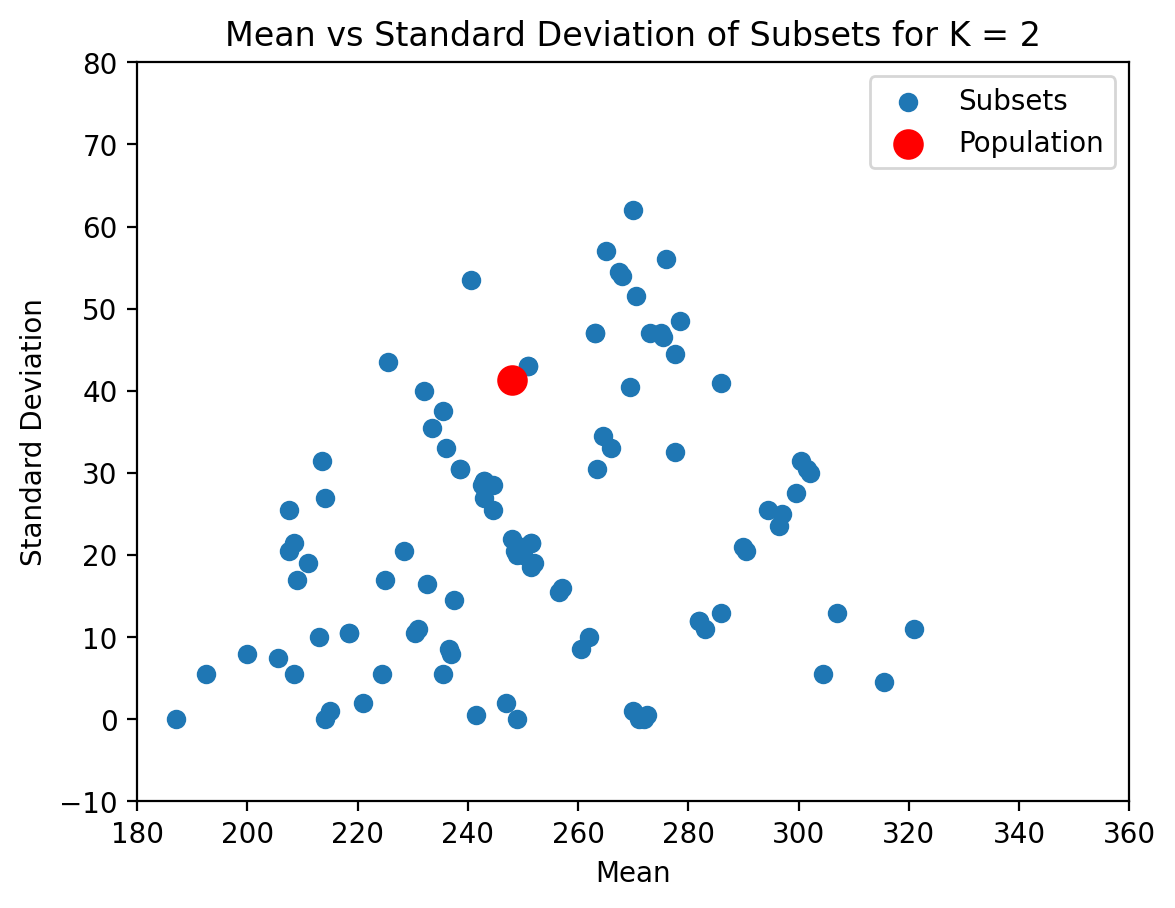

In [59]:
plot_subsets(vals_Delhi, 2)

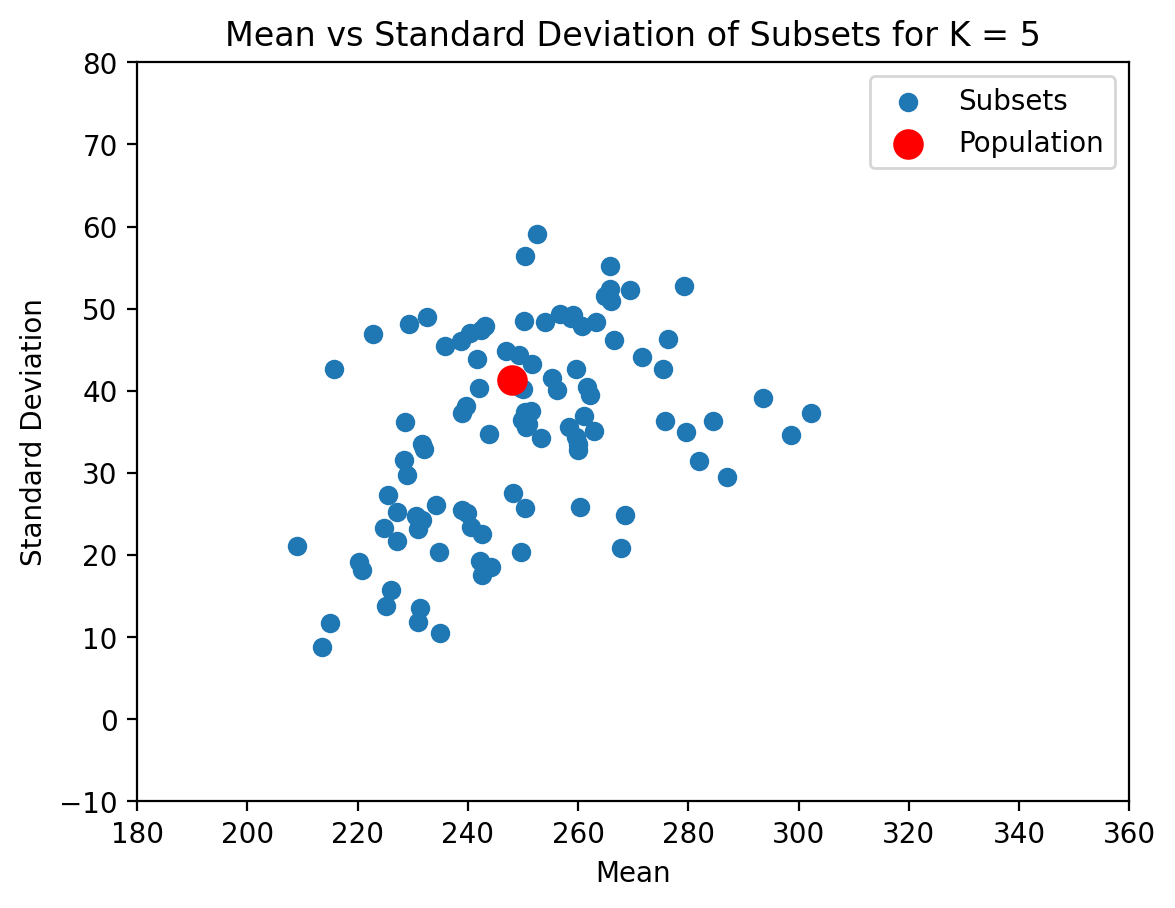

In [60]:
plot_subsets(vals_Delhi, 5)

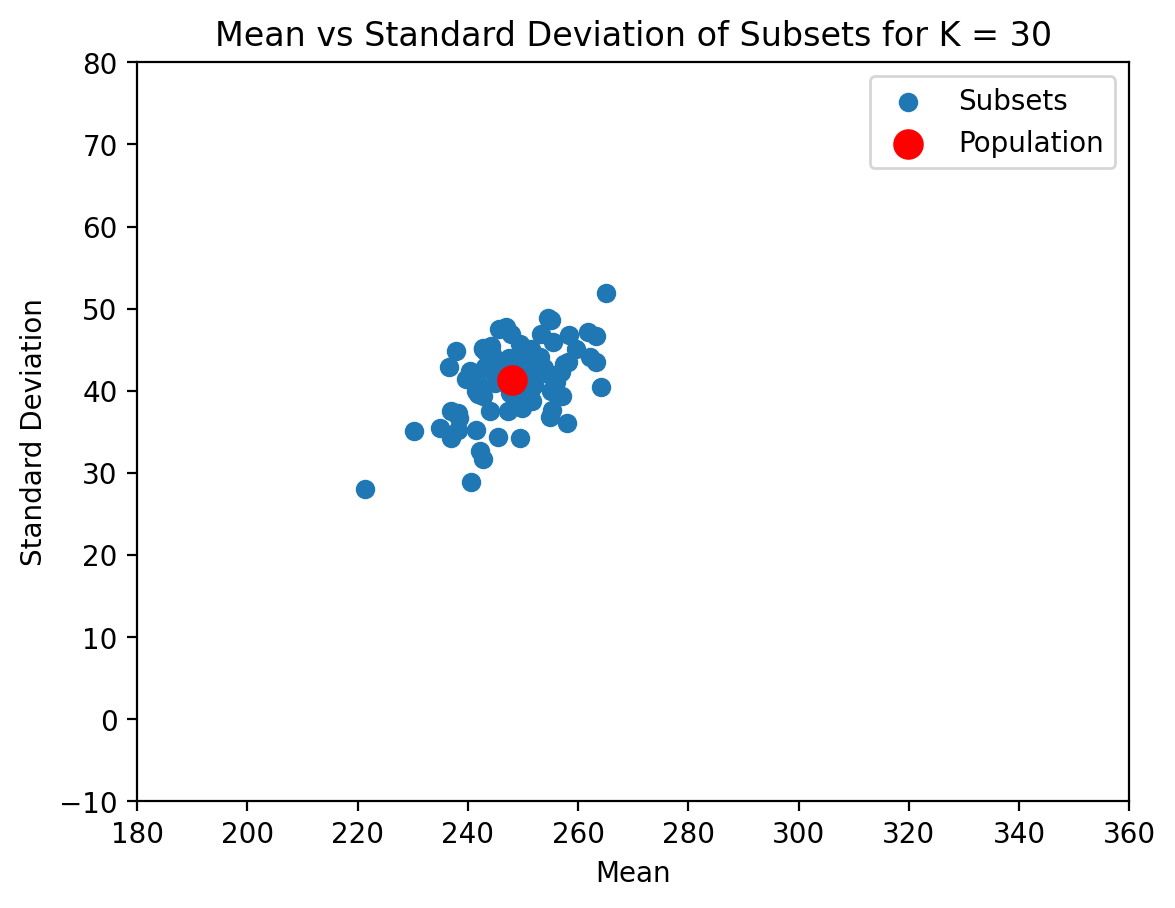

In [61]:
plot_subsets(vals_Delhi, 30)

In [43]:
def plot_distribution(vals, city='Delhi'):
    # Fit a normal distribution to the data
    mu, std = np.mean(vals), np.std(vals, ddof=0)

    # Plot the normal distribution
    xs = np.linspace(0, 400, 1000)

    ys = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (xs - mu)**2 / (2 * std**2) )

    plt.plot(xs, ys)

    # Mark the mean
    plt.axvline(mu, color='r', linestyle='--', label = 'Mean')

    # Mark the values via rag plot
    plt.plot(vals, [0]*len(vals), 'k|', label = 'Values')
    
    standard_error_mean = std / np.sqrt(len(vals)-1)


    # Mark the 95% confidence interval of SEM with shading 
    fac = 1.96
    sem_times_fac = standard_error_mean * fac
    plt.fill_between(xs, 0, ys, where = (xs > mu - sem_times_fac) & (xs < mu + sem_times_fac), color = 'r', alpha = 0.5, label = '95% CI of SEM')
    plt.legend()
    plt.title(f'Distribution of values in {city}\n Mean: {mu:.2f}, Sample STDEV: {std:.2f} Standard Error of Mean: {standard_error_mean:.2f}')

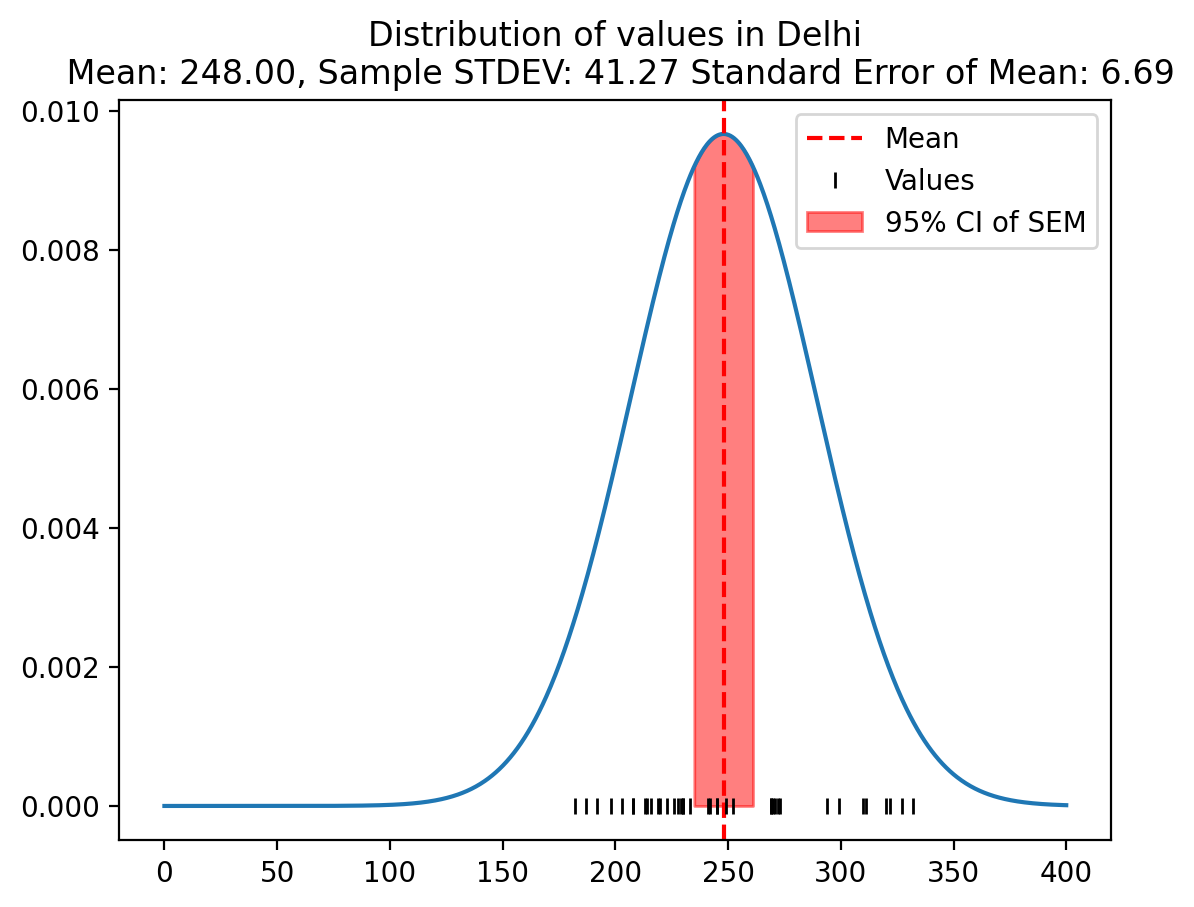

In [44]:
plot_distribution(vals_Delhi, city='Delhi')

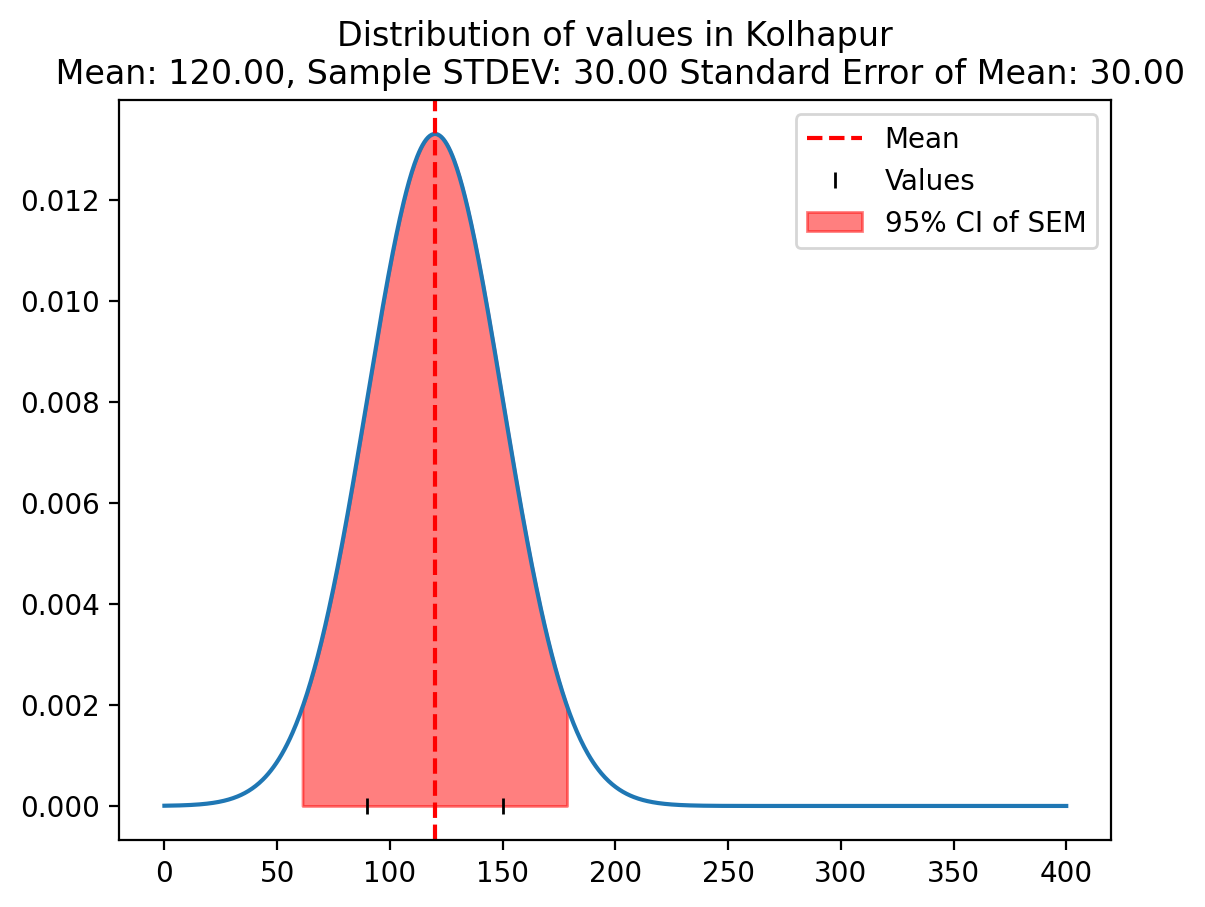

In [45]:
plot_distribution(vals_Kolhapur, city='Kolhapur')